# Project - Retail: 
## Building Materials Store

**Main objective of the project:**

- To analyse the shop's loyalty programme:
     - Evaluate the results of the loyalty programme implementation, namely whether the key performance indicators of the customers included in the loyalty programme are increasing;
     - To understand how well the loyalty programme has worked and whether it is worth using it further.


- Prepare the main project, presentation and dashboard on the basis of the conducted analysis and present the obtained results and make specific recommendations for the business.

**Job Steps:**

- Data loading and preparation for research;
- Research analysis of the data;
- Solving the main questions of the customer;
- Statistical hypothesis testing (two H0 hypotheses);
- Conclusion and recommendations to the customer;
- Materials for colleagues in the commercial department:
    - Prepare presentation and dashboard.

--------

### 1. Data loading and preparation for the study:

- Loading data / Overview of the dataframe
- Checking data types and converting them to the required format
- Handling missing values
- Search for explicit/implicit duplicates

In [1]:
# Connect basic libraries and read external data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import scipy.stats as stats
from scipy import stats as st
from scipy.stats import mannwhitneyu
import warnings; warnings.filterwarnings(action = 'ignore')

In [2]:
# Reading retail_dataset.csv data:

path = '/Users/elenpogosan/python_data/Final_project/'

try:
    retail_data = pd.read_csv(path + 'retail_dataset.csv')
except:
    retail_data = pd.read_csv('/datasets/retail_dataset.csv')

In [3]:
# Reading product_codes.csv data:

try:
    product_data = pd.read_csv(path + 'product_codes.csv')
except:
    product_data = pd.read_csv('/datasets/product_codes.csv')

df retail_data:

- `purchaseId` - id of the cheque;
- `item_ID` - id of item;
- `purchasedate` - date of purchase;
- `Quantity` - quantity of goods;
- `CustomerID` - id of the customer;
- `ShopID` - id of the shop;
- `loyalty_program` - whether the customer participates in the loyalty programme;

df product_data:

- `productID` - id of the product;
- `price_per_one` - cost of one unit of goods;

In [4]:
display(retail_data.head())

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [5]:
display(product_data.head())

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [7]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [8]:
# Correction in column names:

retail_data = retail_data.rename(columns={'purchaseid': 'purchase_id', 'item_ID': 'item_id',
                                          'Quantity': 'quantity', 'purchasedate': 'purchase_date',
                                          'CustomerID': 'customer_id', 'ShopID': 'shop_id'})

product_data = product_data.rename(columns={'productID': 'product_id'})

In [9]:
# replace the date data type:

retail_data['purchase_date'] = pd.to_datetime(retail_data['purchase_date'])

In [10]:
print(retail_data['purchase_date'].describe())

count                           105335
mean     2017-01-09 18:18:42.962927872
min                2016-12-01 08:26:00
25%                2016-12-12 13:32:00
50%                2017-01-11 12:41:00
75%                2017-02-01 15:12:00
max                2017-02-28 17:04:00
Name: purchase_date, dtype: object


- **Beginning of data recording:**
  - 1 December 2016; 08:26:00 PM.
- **End of data recording:** 
  - 28 February 2017; 17:04:00

In [11]:
display(retail_data.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


- The retail_data dataframe contains 105335 rows, 7 columns, there are no gaps in the first four columns but there are significant gaps in the customer_id column (36210 rows or 34.4%);


- The product_data dataframe contains 9969 rows, 2 columns, no column omissions.


- Corrections:
    - Correction of column names;
    - Replacement of purchase_date column data type.

In [12]:
# Checking for duplicates

print('Duplicates retail_data:', retail_data.duplicated().sum())
print('Duplicates product_data:', product_data.duplicated().sum())

Duplicates retail_data: 1033
Duplicates product_data: 0


In [13]:
# Function for implicit duplicates:

def clean_duplicates(value):
    if isinstance(value, str):
        value = value.lower() # Перевод к нижнему регистру
        value = value.strip() # Удаление пробелов в начале и конце строки
        return value
    return value

# Applying the function to each element of the dataframe
data_cleaned = retail_data.applymap(clean_duplicates)


# Finding duplicates after data cleansing
duplicates_cnt = data_cleaned.duplicated(keep='first').sum()

# Displaying the number of duplicates
print(f'Implicit duplicates: {duplicates_cnt}')

Implicit duplicates: 1033


- Duplicates less than 1% of the df data can be left as there is no clear understanding that these are erroneous duplicates.

In [14]:
# Number of skips by dataframe column:

print(retail_data.isna().sum())
print('--------------------------')
print(product_data.isna().sum())

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
shop_id                0
loyalty_program        0
dtype: int64
--------------------------
product_id       0
price_per_one    0
dtype: int64


- The omissions in customer_id may be from random customers who are not in the loyalty programme, so we will not delete at this stage

In [15]:
print(retail_data['shop_id'].unique())

['Shop 0' 'Shop 1' 'Shop 4' 'Shop 6' 'Shop 2' 'Shop 11' 'Shop 3' 'Shop 5'
 'Shop 7' 'Shop 12' 'Shop 8' 'Shop 27' 'Shop 10' 'Shop 20' 'Shop 19'
 'Shop 25' 'Shop 14' 'Shop 21' 'Shop 18' 'Shop 9' 'Shop 16' 'Shop 28'
 'Shop 29' 'Shop 17' 'Shop 22' 'Shop 13' 'Shop 26' 'Shop 24' 'Shop 15'
 'Shop 23' 'Shop 30']


- 31 construction shops in the network

In [16]:
print(retail_data['quantity'].describe())

count    105335.000000
mean          7.821218
std         327.946695
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64


In [17]:
# Total number of values in the column
total_df_values = retail_data.shape[0]

# Check negative values
negative_val = retail_data[retail_data['quantity'] < 0].shape[0]
print(f"Number of negative values: {negative_val} or \
{round(negative_val / total_df_values * 100, 2)}%")

# Checking zero values
zero_val = retail_data[retail_data['quantity'] == 0].shape[0]
print(f"Number of zero values: {zero_val} or \
{round(zero_val / total_df_values * 100, 2)}%")

Number of negative values: 2118 or 2.01%
Number of zero values: 33055 or 31.38%


- Negative values of only 2% can be deleted, which may be an error in the cash register record or data transfer;
- Zero values can be left, as they are too many to delete and some of these data may be write-offs.

In [18]:
# Removal of negative and explicit emissions

max_value = retail_data['quantity'].max()
min_value = retail_data['quantity'].min()

retail_data = retail_data[(retail_data['quantity'] != max_value) & (retail_data['quantity'] != min_value) & \
                 (retail_data['quantity'] >= 0)]

In [19]:
print(retail_data['quantity'].describe())

count    103216.000000
mean          8.422105
std          44.849522
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max        5567.000000
Name: quantity, dtype: float64


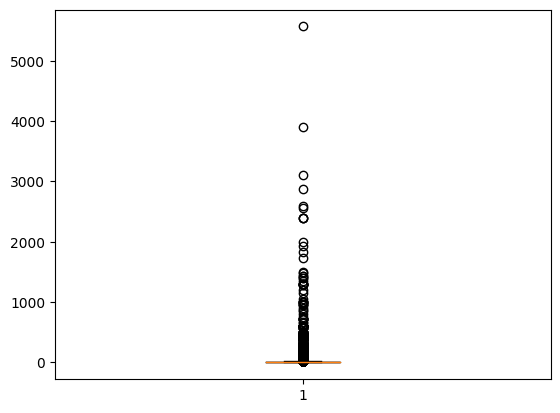

In [20]:
plt.boxplot(retail_data['quantity'])
plt.show()

- Still a lot of outliers or maybe it is not outliers but large purchases with many different items;
- The 3rd quartile shows that 75% of the values are below 8;
- You can try to filter the values in more detail and remove the values that are too steep from the analysis, and you can make a correction of 1.5 interquartile range to determine outliers.

In [21]:
q1 = retail_data['quantity'].quantile(0.25)
q3 = retail_data['quantity'].quantile(0.75)
q_range = q3 - q1

lower_range = q1 - 1.5 * q_range
upper_range = q3 + 1.5 * q_range

retail_data = retail_data[(retail_data['quantity'] >= lower_range) & (retail_data['quantity'] <= upper_range)]

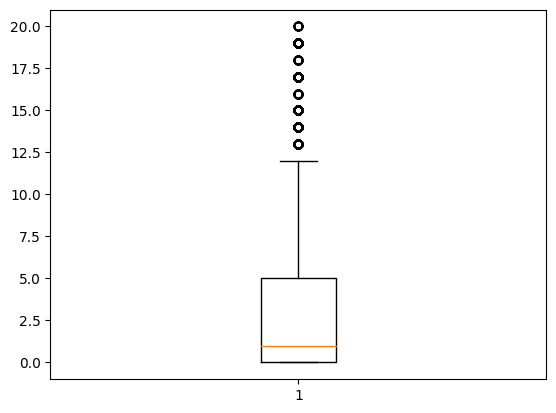

In [22]:
plt.boxplot(retail_data['quantity'])
plt.show()

In [23]:
print(retail_data['quantity'].describe())

count    93402.000000
mean         3.274491
std          4.198311
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max         20.000000
Name: quantity, dtype: float64


- There were 105335 values became 93402, cleaned 11933 or 11.3%

In [24]:
# Preparing df for further merging, grouping by cheque and item id
retail_data = retail_data.groupby(['purchase_id', 'item_id']).agg({
    'quantity': 'sum', 
    'purchase_date': 'first',
    'customer_id': 'first',
    'shop_id': 'first',
    'loyalty_program': 'first'
}).reset_index()

In [25]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91555 entries, 0 to 91554
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      91555 non-null  object        
 1   item_id          91555 non-null  object        
 2   quantity         91555 non-null  int64         
 3   purchase_date    91555 non-null  datetime64[ns]
 4   customer_id      56306 non-null  float64       
 5   shop_id          91555 non-null  object        
 6   loyalty_program  91555 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 4.9+ MB


In [26]:
product_data['price_per_one'].describe()

count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price_per_one, dtype: float64

In [27]:
# Preparing df for further merging, grouping by product id and price averaging
product_data = product_data.groupby('product_id').agg({'price_per_one': 'mean'}).reset_index()

In [28]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [29]:
# Merge 2 tables by product id
data = retail_data.merge(product_data, left_on='item_id', right_on='product_id', how='inner')

In [30]:
display(data.head(10))

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,product_id,price_per_one
0,536365,21730,5,2016-12-01 08:26:00,23529.0,Shop 0,1.0,21730,7.3325
1,536373,21730,5,2016-12-01 09:02:00,23529.0,Shop 0,1.0,21730,7.3325
2,536375,21730,5,2016-12-01 09:32:00,23529.0,Shop 0,1.0,21730,7.3325
3,536396,21730,5,2016-12-01 10:51:00,23529.0,Shop 0,1.0,21730,7.3325
4,536406,21730,5,2016-12-01 11:33:00,23529.0,Shop 0,1.0,21730,7.3325
5,536600,21730,3,2016-12-02 08:32:00,23529.0,Shop 0,1.0,21730,7.3325
6,536602,21730,3,2016-12-02 08:34:00,23529.0,Shop 0,1.0,21730,7.3325
7,536609,21730,5,2016-12-02 09:41:00,23529.0,Shop 0,1.0,21730,7.3325
8,536612,21730,3,2016-12-02 09:44:00,23529.0,Shop 0,1.0,21730,7.3325
9,536628,21730,5,2016-12-02 10:54:00,23529.0,Shop 0,1.0,21730,7.3325


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91555 entries, 0 to 91554
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      91555 non-null  object        
 1   item_id          91555 non-null  object        
 2   quantity         91555 non-null  int64         
 3   purchase_date    91555 non-null  datetime64[ns]
 4   customer_id      56306 non-null  float64       
 5   shop_id          91555 non-null  object        
 6   loyalty_program  91555 non-null  float64       
 7   product_id       91555 non-null  object        
 8   price_per_one    91555 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.3+ MB


--------

### 2. exploratory data analysis:

- Conduct exploratory analyses of the distribution of key variables
- Finding patterns and analysing the relationship of variables to each other

In [32]:
# Allocate the quantity of a particular item in a cheque

data['quantity'].describe()

count    91555.000000
mean         3.340549
std          4.250035
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max         38.000000
Name: quantity, dtype: float64

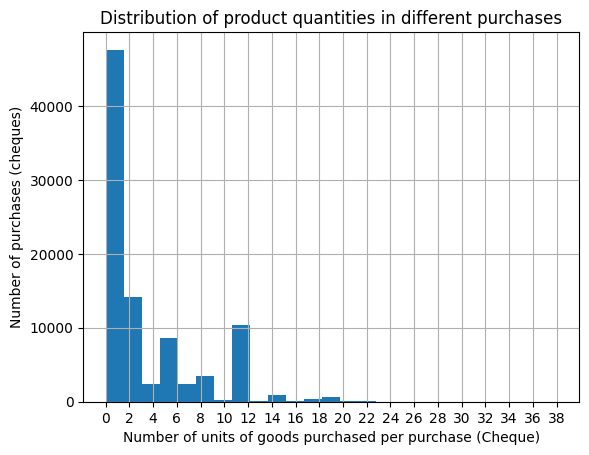

In [33]:
data['quantity'].hist(bins=25)
plt.xticks(range(0, data['quantity'].max()+1, 2)) # шаг деления оси Х
plt.xlabel('Number of units of goods purchased per purchase (Cheque)')
plt.ylabel('Number of purchases (cheques)')
plt.title('Distribution of product quantities in different purchases')
plt.show()

- In the overwhelming number of cheques (purchases), about 60 thousand out of 91555 or 65.5% purchased 1-2 units of goods;
- There are 2 small bursts of 9-10 thousand cheques with 5 and 11 units of goods;
- The median is 1 unit of goods, the mean is 3 units of goods;
- 75% of purchases contain up to 5 units of goods.

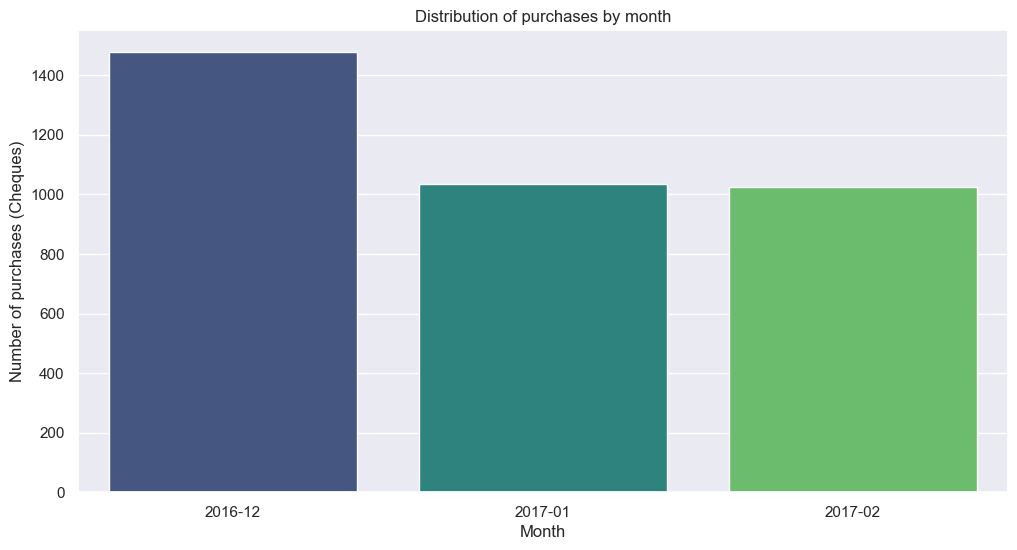

In [34]:
# Select the year and month from purchase_date:
data["year_month"] = data["purchase_date"].dt.to_period("M")

# new df with the number of purchases by month
month_purchase = data.groupby("year_month")['purchase_id'].nunique().reset_index()

# Rename the columns
month_purchase.columns = ['month', 'purchases_count']

# Graph sns
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.barplot(x='month', y='purchases_count', data=month_purchase, palette='viridis')
plt.title('Distribution of purchases by month')
plt.xlabel('Month')
plt.ylabel('Number of purchases (Cheques)')
plt.show();

- It can be seen that the maximum number of purchases was in December 2016 - ±1400. Then come January and February 2017 - ±1000 respectively.

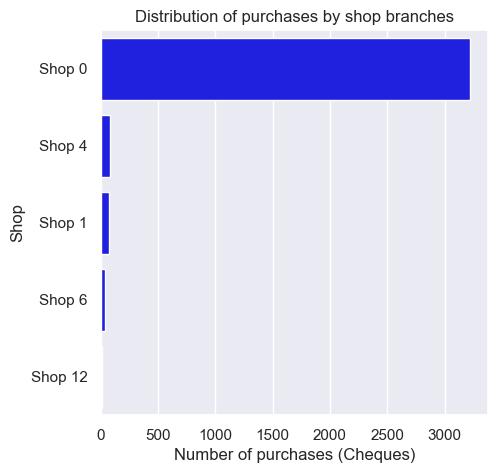

In [35]:
# new df with the number of purchases by shop branches
shop_purchase = data.groupby('shop_id')['purchase_id'].nunique().sort_values(ascending=False).reset_index()

# Rename the columns
shop_purchase.columns = ['shop_id', 'purchases_count']

# Graph sns
plt.figure(figsize=(5, 5))
sns.barplot(y='shop_id', x='purchases_count', data=shop_purchase.head(), orient='h', color='blue')
plt.title('Distribution of purchases by shop branches')
plt.xlabel('Number of purchases (Cheques)')
plt.ylabel('Shop')
plt.show();

In [36]:
total_purchases = data['purchase_id'].nunique() # Total unique purchases

shop_purchase['percent_purchases'] = (shop_purchase['purchases_count'] / total_purchases * 100)

display(round(shop_purchase.head(), 2))

,shop_id,purchases_count,percent_purchases
0,Shop 0,3217,91.00
1,Shop 4,79,2.23
2,Shop 1,71,2.01
3,Shop 6,36,1.02
4,Shop 12,16,0.45


In [37]:
print(f'Total unique purchases: {total_purchases}')

Total unique purchases: 3535


- Shop 0 leads by a wide margin with 3,217 purchases out of 3,535 total purchases or 91% of all purchases

In [38]:
# Correlation between quantity and price_per_one:

data[['quantity', 'price_per_one']].corr()

,quantity,price_per_one
quantity,1.00000,-0.03817
price_per_one,-0.03817,1.00000


- We observe an inverse correlation (-0.04) close to zero, which indicates the practical absence of correlation between the price per unit of goods and the number of goods.

In [39]:
display(data.groupby('loyalty_program')[['quantity', 'price_per_one']].mean())

,quantity,price_per_one
loyalty_program,,
0.0,3.218798,5.321896
1.0,3.771339,4.816893


- The number of purchased goods from loyalty programme members is on average 17% higher, but the price per unit is on average 10.6% lower.

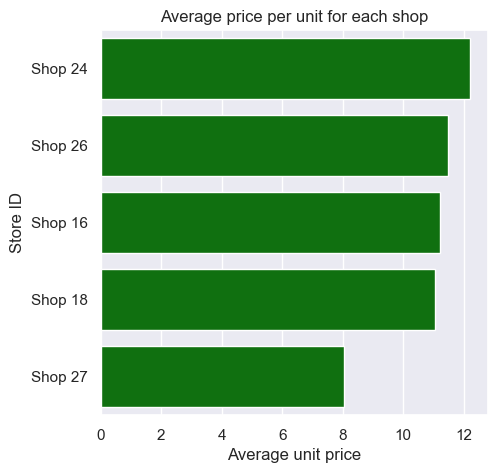

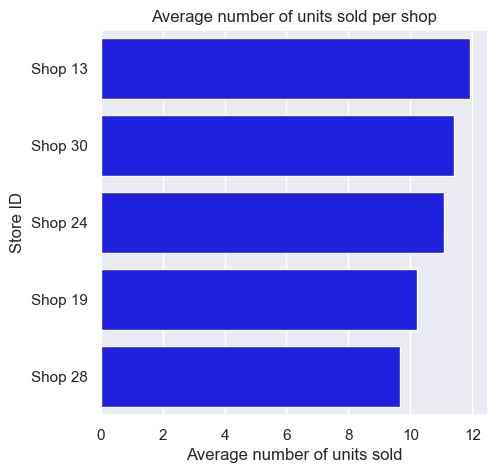

In [40]:
# Distribution in shopping between different shops:

shop_data_price = data.groupby('shop_id')[['quantity', 'price_per_one']].mean().sort_values(by='price_per_one', ascending=False).reset_index()

shop_data_quantity = data.groupby('shop_id')[['quantity', 'price_per_one']].mean().sort_values(by='quantity', ascending=False).reset_index()

# График 1
plt.figure(figsize=(5, 5))
sns.barplot(y='shop_id', x='price_per_one', data=shop_data_price.head(), orient='h', color='green')
plt.title('Average price per unit for each shop')
plt.xlabel('Average unit price')
plt.ylabel('Store ID')
plt.show();

# График 2
plt.figure(figsize=(5, 5))
sns.barplot(y='shop_id', x='quantity', data=shop_data_quantity.head(), orient='h', color='blue')
plt.title('Average number of units sold per shop')
plt.xlabel('Average number of units sold')
plt.ylabel('Store ID')
plt.show();

- Top 3 stores by average price per item: **Shop 24, 26, 16**
- Top 3 stores by average number of items: **Shop 13, 30, 24**

In [41]:
# Calculation of revenue without payments from programme participants:

data['revenue'] = data['quantity'] * data['price_per_one']

sales_revenue = data['revenue'].sum()

In [42]:
print(f'Revenue (Without loyalty programme): {round(sales_revenue, 2)} rub.')

Revenue (Without loyalty programme): 1089978.78 rub.


In [43]:
# Calculation of total revenue:
loyalty_revenue_total = data[data['loyalty_program'] == 1].groupby('year_month')\
['customer_id'].nunique().sum() * 200

total_revenue = sales_revenue + loyalty_revenue_total

print(f'Total Revenue: {round(total_revenue, 2)} rub.')

Total Revenue: 1243978.78 rub.


In [44]:
# Payments for the loyalty programme by month:

loyalty_revenue = data[data['loyalty_program'] == 1].groupby('year_month').agg(
    loyalty_revenue=('customer_id', 'nunique')) * 200
display(loyalty_revenue)

,loyalty_revenue
year_month,
2016-12,61400
2017-01,44400
2017-02,48200


In [45]:
# Let's look at the revenue for each shop

shops_revenue = data.groupby('shop_id').agg(
    shops_revenue=('revenue', 'sum')).sort_values(by='shops_revenue', ascending=False)

display(round(shops_revenue.head(10), 2))

,shops_revenue
shop_id,
Shop 0,938454.41
Shop 4,35836.29
Shop 1,30995.38
Shop 6,19805.94
Shop 8,9456.57
Shop 10,7026.51
Shop 7,5489.14
Shop 12,4953.97
Shop 2,4646.16


--------

### 3. Resolving basic customer issues:

- Average cheque;
- Frequency of purchases;
- LTV;
- Percentage of purchases under the loyalty programme;
- Percentage of customers participating in the loyalty programme;
- Average number of goods in a cheque.

In [46]:
# Average check including loyalty programme:

avg_receipt = total_revenue / data['purchase_id'].nunique()

In [47]:
print(f'The average cheque is general: {round(avg_receipt, 2)} rub.')

The average cheque is general: 351.9 rub.


In [48]:
# Average cheque for each group

loyal_group = data[data['loyalty_program'] == 1]
non_loyal_group = data[data['loyalty_program'] == 0]

# Total revenue for each group
revenue_loyal_group = loyal_group['revenue'].sum() + loyal_group['customer_id'].nunique() * 200
revenue_non_loyal_group = non_loyal_group['revenue'].sum()

# Number of unique purchases
unique_purch_loyal = loyal_group['purchase_id'].nunique()
unique_purch_non_loyal = non_loyal_group['purchase_id'].nunique()

# Calculate the average cheque for each group
avg_receipt_loyal = revenue_loyal_group / unique_purch_loyal
avg_receipt_non_loyal = revenue_non_loyal_group / unique_purch_non_loyal

In [49]:
print(f'Average cheque - loyal customer: {round(avg_receipt_loyal, 2)} rub.')
print(f'Average cheque - Non-loyal customer: {round(avg_receipt_non_loyal, 2)} rub.')

Average cheque - loyal customer: 371.14 rub.
Average cheque - Non-loyal customer: 325.57 rub.


In [50]:
# Purchase frequency: this is the number of cheques divided by the number of unique customers.

purchase_freq = data['purchase_id'].nunique() / data['customer_id'].nunique()

In [51]:
print(f'Frequency of purchases: {round(purchase_freq, 2)}')

Frequency of purchases: 2.21


In [52]:
# Grouping data:
num_purchases_by_cust = data.groupby(['customer_id', 'loyalty_program'])['purchase_id'].nunique().reset_index()

# Calculate the average number of purchases per customer:
avg_purchases_loyal = num_purchases_by_cust[num_purchases_by_cust['loyalty_program'] == 1]['purchase_id'].mean()
avg_purchases_non_loyal = num_purchases_by_cust[num_purchases_by_cust['loyalty_program'] == 0]['purchase_id'].mean()

In [53]:
print(f'Average number of purchases per loyal customer:  {round(avg_purchases_loyal, 3)}')
print(f'Average number of purchases per non-loyal customer: {round(avg_purchases_non_loyal, 3)}')

Average number of purchases per loyal customer:  1.923
Average number of purchases per non-loyal customer: 1.936


In [54]:
# LTV calculation. Finding the first month of purchase for each customer.

first_purchase_date = data.groupby('customer_id')['year_month'].min()
first_purchase_date.name = 'first_purchase_month'
data = data.join(first_purchase_date, on='customer_id')

In [55]:
# Group customers by month of first purchase and calculate total revenue for each cohort:

cohorts = data.groupby(['first_purchase_month', 'year_month']).agg({
    'revenue': 'sum',
    'customer_id': 'nunique'
})

In [56]:
display(cohorts)

revenue  customer_id
first_purchase_month year_month                            
2016-12              2016-12     361925.320371          836
                     2017-01     152309.548042          299
                     2017-02     111806.487204          261
2017-01              2017-01     153272.896758          404
                     2017-02      31907.417012           85
2017-02              2017-02     135773.660834          360

In [57]:
# Average revenue per customer for each cohort

cohorts['revenue_per_user'] = cohorts['revenue'] / cohorts['customer_id']

In [58]:
# LTV calculation for each cohort

cohorts = cohorts.reset_index()
cohorts['cohort_lifetime'] = (cohorts['year_month'] - cohorts['first_purchase_month']).apply(lambda x: x.n)

ltv_cohort = cohorts[cohorts['cohort_lifetime'] < 3].groupby('first_purchase_month').agg(
    ltv_cohort=('revenue_per_user', 'sum'))

In [59]:
display(round(ltv_cohort, 2))

,ltv_cohort
first_purchase_month,
2016-12,1370.70
2017-01,754.77
2017-02,377.15


- ltv_cohort shows the average total revenue that the company received from one customer in each cohort over the observation period since their first purchase.
- A cohort is a group of customers who made their first purchase in a particular month.

    - On average, each customer who made their first purchase in December 2016 (2016-12) brought 1,370.70 to the company over the observation period.
    - January 2017 customers brought in 754.77 RUB.
    - February 2017 customers brought 377.15 RUB.

In [60]:
# Percentage of purchases under the loyalty programme
loyal_purch_percent = (data[data['loyalty_program'] == 1]['purchase_id'].nunique() / data['purchase_id'].nunique()) * 100

print(f"Percentage of purchases under the loyalty programme: {round(loyal_purch_percent, 2)}%")

Percentage of purchases under the loyalty programme: 29.48%


In [61]:
# Percentage of customers participating in the loyalty programme
loyal_customers_percent = (data[data['loyalty_program'] == 1]['customer_id'].nunique() / data['customer_id'].nunique()) * 100

print(f"Percentage of customers participating in the loyalty programme: {round(loyal_customers_percent, 2)}%")

Percentage of customers participating in the loyalty programme: 33.88%


In [62]:
# Average number of items in a cheque
avg_items = data['quantity'].sum() / data['purchase_id'].nunique()

print(f"Average number of goods in a cheque: {round(avg_items, 1)}")

Average number of goods in a cheque: 86.5


### 4. Statistical hypothesis testing (two H0 hypotheses):

- Formulation of 2 null and alternative hypotheses;
- Selection of appropriate statistical tests;
- Carrying out statistical testing;
- Interpretation of test results.

``Hypothesis 1:``
- H0: The average cheque of customers participating in a loyalty programme is **not different** from the average cheque of customers not participating in a loyalty programme.
- H1: The average cheque of customers participating in the loyalty programme is **different** from the average cheque of customers not participating in the loyalty programme.

``alpha = 0.05``

In [63]:
# Calculating the amount for each group

loyalty_hyp_1 = data[data['loyalty_program'] == 1]['revenue']

non_loyalty_hyp_1 = data[data['loyalty_program'] == 0]['revenue']

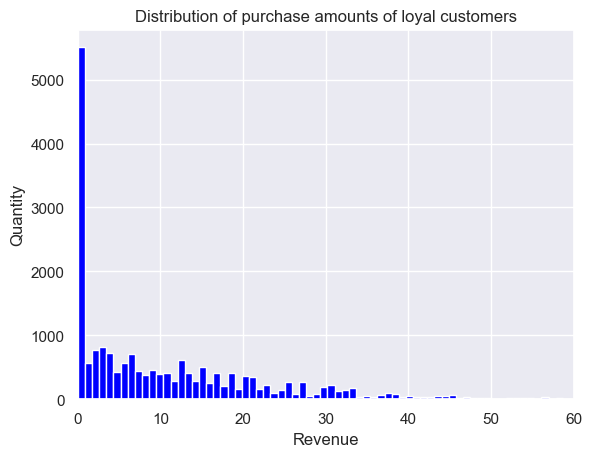

In [64]:
# Chart loyalty_hyp_1:

loyalty_hyp_1.hist(bins=5000, color='blue')
plt.xlim(0, 60)
plt.title('Distribution of purchase amounts of loyal customers')
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.show();

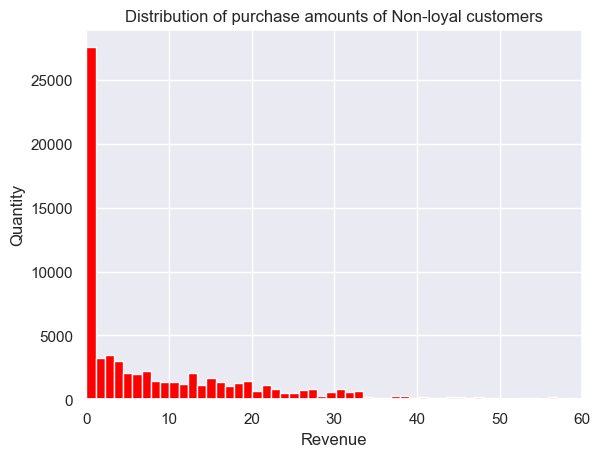

In [65]:
# Schedule non_loyalty_hyp_1:

non_loyalty_hyp_1.hist(bins=5000, color='red')
plt.xlim(0, 60)
plt.title('Distribution of purchase amounts of Non-loyal customers')
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.show();

- The distribution deviates strongly from normal, the Mann-Whitney U-test can be applied.

In [66]:
# Применение теста Манна-Уитни

stat, p = mannwhitneyu(loyalty_hyp_1, non_loyalty_hyp_1)

print('p-value:', p)

# alpha - significance level value
alpha = .05

# display the p-value on the screen
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 1.231303549422221e-148
Reject the null hypothesis


- We have statistically significant evidence of a difference between the average cheques of these two groups of shoppers;
- The loyalty programme affects the average cheque of customers, namely:
    - Average cheque - Loyal customer: 371.14 rub.
    - Average cheque - Non-loyal customer: 325.57 rubles.
- This may indicate the effectiveness of the loyalty programme in terms of increasing sales;
- It is worth considering the possibility of expanding the programme or creating additional incentives for participation in it.

--------

```Hypothesis 2:```.
- H0: The number of purchases per customer from customers participating in a loyalty programme is **not different** from the frequency of purchases from customers not participating in a loyalty programme.
- H1: The number of purchases per customer from customers participating in the loyalty programme **differ** from the frequency of purchases from customers not participating in the loyalty programme.

```alpha = 0.05```

In [67]:
# Calculating the number of purchases per customer

loyal_purch_hyp_2 = loyal_group.groupby('customer_id')['purchase_id'].nunique()
non_loyal_purch_hyp_2 = non_loyal_group.groupby('customer_id')['purchase_id'].nunique()

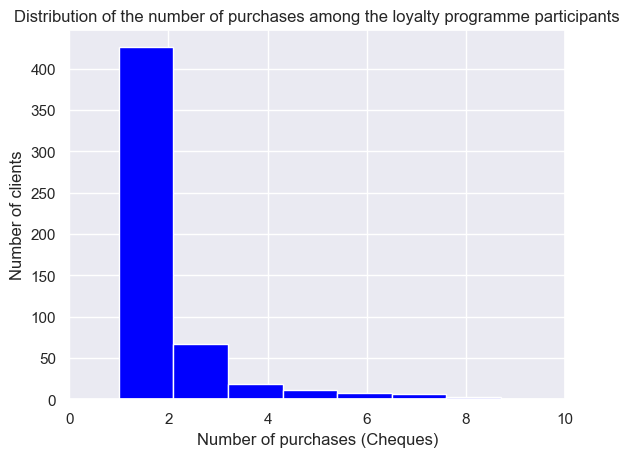

In [68]:
# Chart loyal_purchase_hyp_2:
loyal_purch_hyp_2.hist(bins=30, color='blue')
plt.xlim(0, 10)         
plt.title('Distribution of the number of purchases among the loyalty programme participants')
plt.xlabel('Number of purchases (Cheques)')
plt.ylabel('Number of clients')
plt.show();

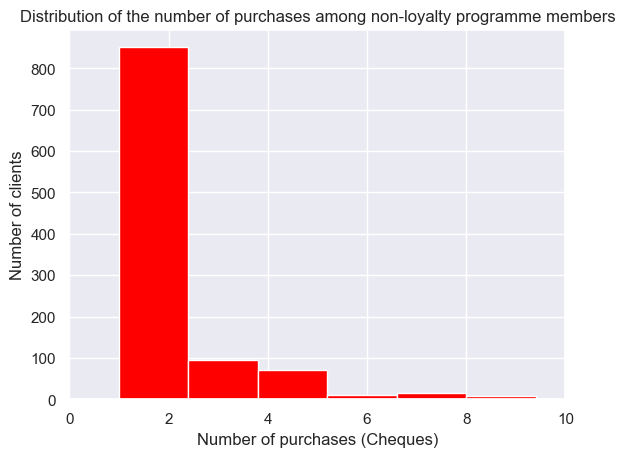

In [69]:
# Chart non_loyal_purchase_hyp_2:

non_loyal_purch_hyp_2.hist(bins=30, color='red')
plt.xlim(0, 10)         
plt.title('Distribution of the number of purchases among non-loyalty programme members')
plt.xlabel('Number of purchases (Cheques)')
plt.ylabel('Number of clients')
plt.show();

- The distribution in hypothesis 2 also deviates strongly from normal, the Mann-Whitney U-test can be applied.

In [70]:
# Application of the Mann-Whitney test
stat, p = mannwhitneyu(loyal_purch_hyp_2, non_loyal_purch_hyp_2)

print('p-value:', p)

# alpha is the value of the significance level
alpha = .05

# print p-value to the screen
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 0.04553126150006569
Reject the null hypothesis


- We reject the null hypothesis although the value is very close to the alpha of 0.05;
- The number of purchases per customer of customers participating in the loyalty programme is statistically different from the frequency of purchases of customers not participating in the loyalty programme.

### 5. Conclusion and recommendations for the customer:

### Distribution of the number of purchases:

- The overwhelming number of cheques(purchases), approximately 60k out of 91555 or 65.5% purchased 1-2 units of goods;
- There are 2 small spikes of 9-10k cheques with 5 and 11 units of goods;
- The median is 1 unit of goods, the mean is 3 units of goods;
- 75% of purchases contain up to 5 units of goods.

### Distribution of purchases by month:

- December 2016 - **±1400** purchases.
- January 2017 - **±1000** purchases;
- February 2017 - **±1000** purchases;
- The number of items purchased by loyalty programme members is on average 17% higher, but the price per unit is on average 10.6% lower.

### Distribution in purchases between different shops:

- Shop 0 leads by a large margin with 3217 purchases out of 3535 or 91% of all purchases;
- Top 3 shops by average price per item: **Shop 24, 26, 16**
- Top 3 shops by average number of items: **Shop 13, 30, 24**

### Calculation of key retail metrics for customers participating / not participating in the loyalty programme:

- Average cheque - general: **351.9 rub.
    - Average cheque - loyal customer: **371.14 rub.**
    - Average cheque - Non-loyal customer: **325.57 rub.**
- Purchase frequency (How many times on average each client (loyalty programme) makes a purchase): **2.21 purchases**
    - Average number of purchases per loyal customer: **1.923**
    - Average number of purchases per non-loyal customer: **1.936**

### Revenue Calculation:

- The ltv_cohort shows the average total revenue that a company received from a single customer in each cohort over the observation period since their first purchase.
- A cohort is a group of customers who made their first purchase in a particular month.

    - On average, each customer who made their first purchase in December 2016 (2016-12) brought 1,370.70 to the company over the observation period.
    - January 2017 customers brought in R754.77.
    - February 2017 customers brought in R377.15.


- Percentage of loyalty programme purchases: **29.48%**
- Percentage of customers participating in the loyalty programme: **33.88%**
- Average number of goods in a cheque: **86.5**

### Statistical Hypothesis Testing:

- Hypothesis 1: p-value: 1.2e-148 -> Reject the null hypothesis -> H1: The average check of customers participating in the loyalty programme is **different** from the average check of customers not participating in the loyalty programme.
- We have statistically significant evidence of a difference between the average cheques of these two groups of shoppers;
- The loyalty programme affects the average cheque of shoppers, namely:
    - Average cheque - Loyal customer: 371.14 rubles.
    - Average cheque - Non-loyal customer: 325.57 rubles.
- This may indicate the effectiveness of the loyalty programme in terms of increasing sales;
- It is worth considering the possibility of expanding the programme or creating additional incentives for participation in it.

- Hypothesis 2: p-value: 0.0455 -> Reject the null hypothesis -> H1: The number of purchases per customer of customers participating in the loyalty programme is **different** from the frequency of purchases of customers not participating in the loyalty programme.
- The number of purchases per customer from customers participating in the loyalty programme is statistically different from the frequency of purchases from customers not participating in the loyalty programme.

## Recommendations: 

- Average cheque: **Statistically Different**
    - Average cheque - Loyal customer: 371.14 rubles.
    - Average cheque - Non-loyal customer: 325.57 rubles.
- Number of purchases per customer: **Statistically different**
    - Average number of purchases per loyal customer: **1.923**
    - Average number of purchases per non-loyal customer: **1.936**

**According to the results of the analysis we can assume that the loyalty programme is effective, as the average check and revenue indicators are higher for the programme participants, we have statistically significant evidence of the difference between the average customer checks of these two groups of customers.It is recommended to consider the possibility of expanding the programme or creating additional incentives for participation in it.**

--------

### 6. Dashboard

- Preparing a table for Dashboard

In [71]:
data['month_day'] = data["purchase_date"].dt.to_period("D")


In [72]:
display(data.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,product_id,price_per_one,year_month,revenue,first_purchase_month,month_day
0,536365,21730,5,2016-12-01 08:26:00,23529.0,Shop 0,1.0,21730,7.3325,2016-12,36.6625,2016-12,2016-12-01
1,536373,21730,5,2016-12-01 09:02:00,23529.0,Shop 0,1.0,21730,7.3325,2016-12,36.6625,2016-12,2016-12-01
2,536375,21730,5,2016-12-01 09:32:00,23529.0,Shop 0,1.0,21730,7.3325,2016-12,36.6625,2016-12,2016-12-01
3,536396,21730,5,2016-12-01 10:51:00,23529.0,Shop 0,1.0,21730,7.3325,2016-12,36.6625,2016-12,2016-12-01
4,536406,21730,5,2016-12-01 11:33:00,23529.0,Shop 0,1.0,21730,7.3325,2016-12,36.6625,2016-12,2016-12-01


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91555 entries, 0 to 91554
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   purchase_id           91555 non-null  object        
 1   item_id               91555 non-null  object        
 2   quantity              91555 non-null  int64         
 3   purchase_date         91555 non-null  datetime64[ns]
 4   customer_id           56306 non-null  float64       
 5   shop_id               91555 non-null  object        
 6   loyalty_program       91555 non-null  float64       
 7   product_id            91555 non-null  object        
 8   price_per_one         91555 non-null  float64       
 9   year_month            91555 non-null  period[M]     
 10  revenue               91555 non-null  float64       
 11  first_purchase_month  56306 non-null  period[M]     
 12  month_day             91555 non-null  period[D]     
dtypes: datetime64[ns

In [74]:
data.to_csv('final_project_dashboard_table.csv')